In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 320
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0010"
MODEL_NAME = "0001_0010-64-convsim-xc3"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.1418
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.2947

from tensorflow.keras.optimizers import RMSprop
hyperparams.OPTIMIZER = RMSprop(learning_rate=0.0005)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'RMSprop',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
        dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
        dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/
Noisy files:19657
Nitid files:19657
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/validation/
Noisy files:4900
Nitid files:4900


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/320
615/615 [==============================] - 12s 10ms/step - loss: 0.0498 - val_loss: 0.0539
Epoch 2/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0441 - val_loss: 0.0465
Epoch 3/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0428 - val_loss: 0.0460
Epoch 4/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0415 - val_loss: 0.0453
Epoch 5/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0403 - val_loss: 0.0471
Epoch 6/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0391 - val_loss: 0.0394
Epoch 7/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0378 - val_loss: 0.0370
Epoch 8/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0366 - val_loss: 0.0353
Epoch 9/320
615/615 [=========

Epoch 80/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0278 - val_loss: 0.0320
Epoch 81/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0278 - val_loss: 0.0368
Epoch 82/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0278 - val_loss: 0.0309
Epoch 83/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0277 - val_loss: 0.0305
Epoch 84/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0277 - val_loss: 0.0354
Epoch 85/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0277 - val_loss: 0.0300
Epoch 86/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0277 - val_loss: 0.0294
Epoch 87/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0276 - val_loss: 0.0353
Epoch 88/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0276 - val_loss: 0.0330
Epoch 89/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0276

615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - val_loss: 0.0296
Epoch 160/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0263 - val_loss: 0.0306
Epoch 161/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - val_loss: 0.0293
Epoch 162/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - val_loss: 0.0290
Epoch 163/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0263 - val_loss: 0.0298
Epoch 164/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - val_loss: 0.0290
Epoch 165/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0263 - val_loss: 0.0285
Epoch 166/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0263 - val_loss: 0.0297
Epoch 167/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0263 - val_loss: 0.0304
Epoch 168/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0263 - v

615/615 [==============================] - 6s 9ms/step - loss: 0.0258 - val_loss: 0.0296
Epoch 239/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0257 - val_loss: 0.0300
Epoch 240/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0257 - val_loss: 0.0297
Epoch 241/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0257 - val_loss: 0.0290
Epoch 242/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0257 - val_loss: 0.0350
Epoch 243/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0257 - val_loss: 0.0295
Epoch 244/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0257 - val_loss: 0.0288
Epoch 245/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0257 - val_loss: 0.0296
Epoch 246/320
615/615 [==============================] - 5s 9ms/step - loss: 0.0257 - val_loss: 0.0302
Epoch 247/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0257 - v

615/615 [==============================] - 6s 9ms/step - loss: 0.0253 - val_loss: 0.0306
Epoch 318/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0253 - val_loss: 0.0285
Epoch 319/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0253 - val_loss: 0.0294
Epoch 320/320
615/615 [==============================] - 6s 9ms/step - loss: 0.0253 - val_loss: 0.0317
Train size:19657
Valid.size:4900
--- 1814.2842664718628 seconds ---


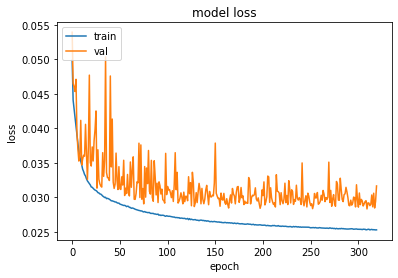

In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xc3\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Black image found
Images count =4900
Best RMSENZ  =4245 (0.87)
Best MAENZ   =4279 (0.87)
Best PSNR    =4245 (0.87)
Best Accuracy=4393 (0.90)
RMSE-NZ  Pred=0.0411  Noisy=0.1031
MAE-NZ   Pred=0.0317  Noisy=0.0937
PSNR     Pred=15.4 dB Noisy=8.8 dB
Accuracy Pred=0.33    Noisy=0.12
SSM      Pred=0.74    Noisy=0.38
HOG MSE  Pred=0.08    Noisy=0.08


In [10]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test/
Noisy files:17
Nitid files:17
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_00_2_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_00_2_nitid_idx008.tif


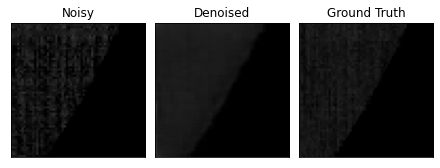

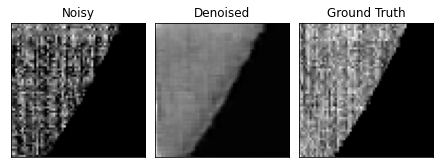

RMSE-NZ  Pred=0.0260  Noisy=0.0423 BEST
MAE-NZ   Pred=0.0169  Noisy=0.0298 BEST
PSNR     Pred=15.4 dB Noisy=11.1 dB BEST
Accuracy Pred=0.55    Noisy=0.36 BEST
SSM      Pred=0.78    Noisy=0.63
HOG MSE  Pred=0.08    Noisy=0.01
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_01_5_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_01_5_nitid_idx017.tif


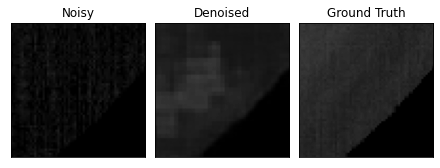

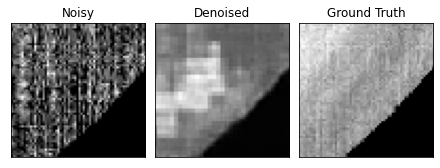

RMSE-NZ  Pred=0.0499  Noisy=0.1180 BEST
MAE-NZ   Pred=0.0393  Noisy=0.1096 BEST
PSNR     Pred=13.6 dB Noisy=6.1 dB BEST
Accuracy Pred=0.26    Noisy=0.07 BEST
SSM      Pred=0.74    Noisy=0.45
HOG MSE  Pred=0.05    Noisy=0.09
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_02_04_9_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_02_04_9_nitid_idx146.tif


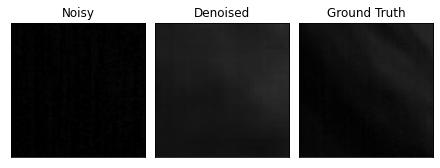

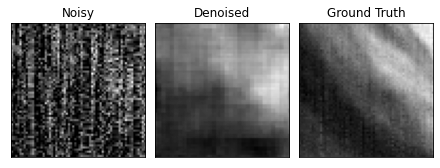

RMSE-NZ  Pred=0.0541  Noisy=0.0587 BEST
MAE-NZ   Pred=0.0510  Noisy=0.0477 WORST
PSNR     Pred=9.3 dB Noisy=8.6 dB BEST
Accuracy Pred=0.02    Noisy=0.13 WORST
SSM      Pred=0.69    Noisy=0.16
HOG MSE  Pred=0.06    Noisy=0.07
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_11_nitid_idx134.tif


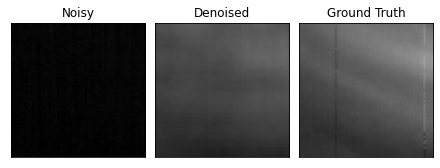

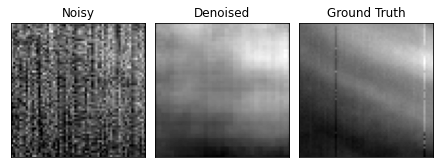

RMSE-NZ  Pred=0.0858  Noisy=0.3357 BEST
MAE-NZ   Pred=0.0738  Noisy=0.3214 BEST
PSNR     Pred=17.4 dB Noisy=5.6 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.82    Noisy=0.12
HOG MSE  Pred=0.08    Noisy=0.11
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_13_nitid_idx134.tif


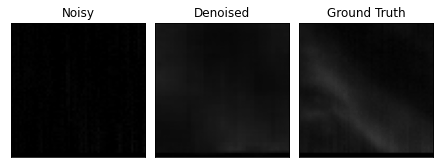

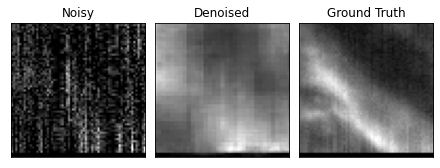

RMSE-NZ  Pred=0.0339  Noisy=0.0869 BEST
MAE-NZ   Pred=0.0261  Noisy=0.0747 BEST
PSNR     Pred=15.9 dB Noisy=7.7 dB BEST
Accuracy Pred=0.21    Noisy=0.01 BEST
SSM      Pred=0.82    Noisy=0.21
HOG MSE  Pred=0.04    Noisy=0.11
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_3_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_3_nitid_idx134.tif


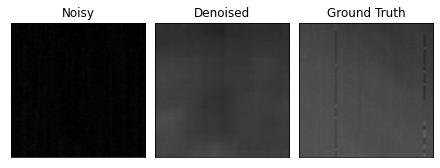

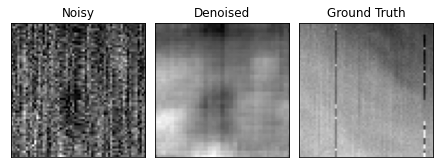

RMSE-NZ  Pred=0.0608  Noisy=0.2662 BEST
MAE-NZ   Pred=0.0564  Noisy=0.2643 BEST
PSNR     Pred=15.9 dB Noisy=3.1 dB BEST
Accuracy Pred=0.03    Noisy=0.00 BEST
SSM      Pred=0.85    Noisy=0.13
HOG MSE  Pred=0.07    Noisy=0.10
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_5_nitid_idx134.tif


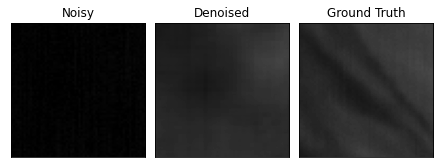

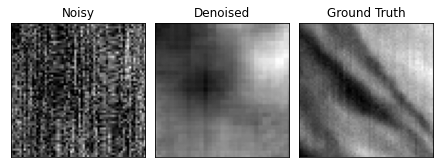

RMSE-NZ  Pred=0.0337  Noisy=0.1729 BEST
MAE-NZ   Pred=0.0275  Noisy=0.1686 BEST
PSNR     Pred=18.6 dB Noisy=4.4 dB BEST
Accuracy Pred=0.20    Noisy=0.00 BEST
SSM      Pred=0.84    Noisy=0.14
HOG MSE  Pred=0.08    Noisy=0.15
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_04_00_10_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_04_00_10_nitid_idx008.tif


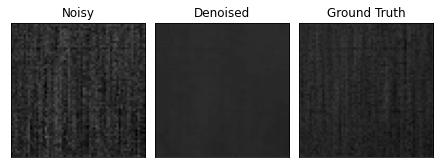

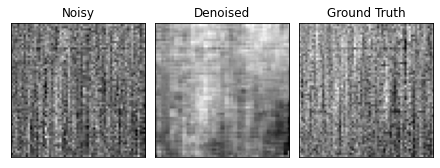

RMSE-NZ  Pred=0.0303  Noisy=0.0606 BEST
MAE-NZ   Pred=0.0240  Noisy=0.0478 BEST
PSNR     Pred=18.1 dB Noisy=12.0 dB BEST
Accuracy Pred=0.27    Noisy=0.15 BEST
SSM      Pred=0.59    Noisy=0.33
HOG MSE  Pred=0.04    Noisy=0.03
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_04_03_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_04_03_5_nitid_idx134.tif


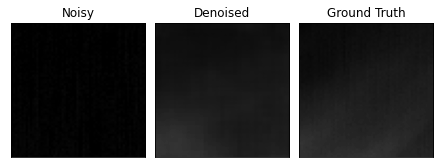

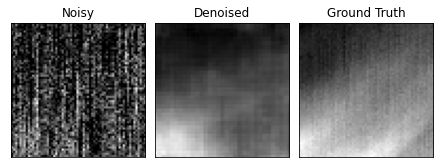

RMSE-NZ  Pred=0.0213  Noisy=0.1061 BEST
MAE-NZ   Pred=0.0163  Noisy=0.0983 BEST
PSNR     Pred=19.7 dB Noisy=5.8 dB BEST
Accuracy Pred=0.37    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.17
HOG MSE  Pred=0.07    Noisy=0.04
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_05_03_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_05_03_8_nitid_idx134.tif


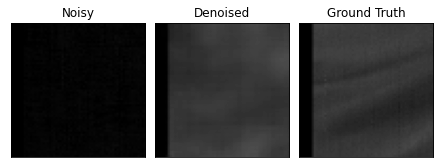

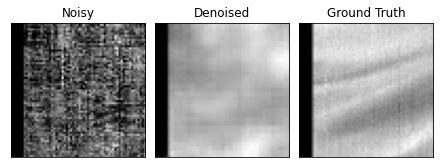

RMSE-NZ  Pred=0.0343  Noisy=0.1969 BEST
MAE-NZ   Pred=0.0269  Noisy=0.1941 BEST
PSNR     Pred=18.4 dB Noisy=3.2 dB BEST
Accuracy Pred=0.28    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.12
HOG MSE  Pred=0.03    Noisy=0.24
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0353_09_00_15_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0353_09_00_15_nitid_idx008.tif


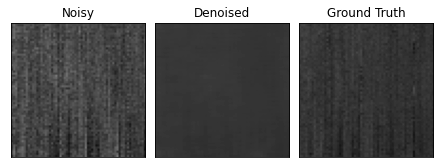

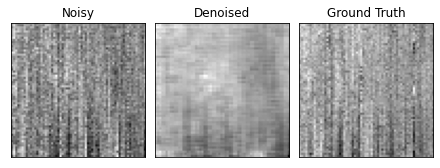

RMSE-NZ  Pred=0.0286  Noisy=0.0925 BEST
MAE-NZ   Pred=0.0219  Noisy=0.0774 BEST
PSNR     Pred=20.3 dB Noisy=10.1 dB BEST
Accuracy Pred=0.31    Noisy=0.06 BEST
SSM      Pred=0.62    Noisy=0.30
HOG MSE  Pred=0.06    Noisy=0.03
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_00_5_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_00_5_nitid_idx008.tif


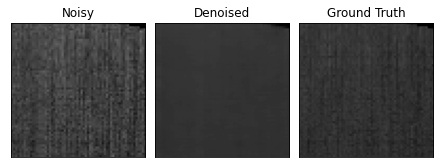

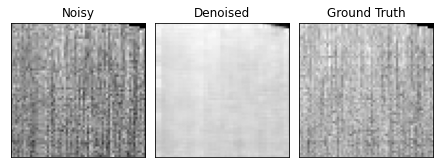

RMSE-NZ  Pred=0.0233  Noisy=0.0770 BEST
MAE-NZ   Pred=0.0183  Noisy=0.0644 BEST
PSNR     Pred=21.6 dB Noisy=11.2 dB BEST
Accuracy Pred=0.34    Noisy=0.08 BEST
SSM      Pred=0.68    Noisy=0.37
HOG MSE  Pred=0.08    Noisy=0.03
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_01_7_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_01_7_nitid_idx017.tif


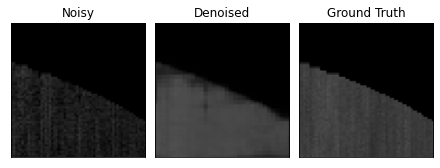

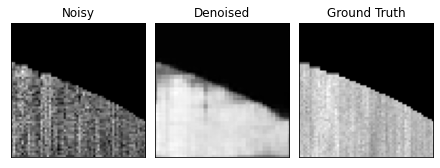

RMSE-NZ  Pred=0.0368  Noisy=0.1235 BEST
MAE-NZ   Pred=0.0236  Noisy=0.1063 BEST
PSNR     Pred=18.7 dB Noisy=8.2 dB BEST
Accuracy Pred=0.52    Noisy=0.19 BEST
SSM      Pred=0.79    Noisy=0.62
HOG MSE  Pred=0.13    Noisy=0.01
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0618_03_01_9_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0618_03_01_9_nitid_idx017.tif


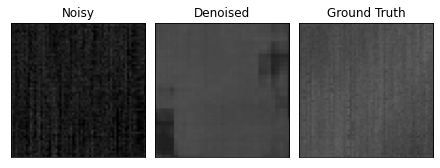

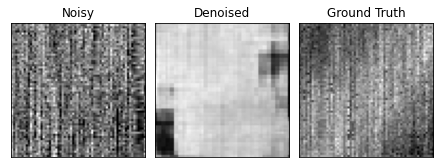

RMSE-NZ  Pred=0.0620  Noisy=0.2174 BEST
MAE-NZ   Pred=0.0435  Noisy=0.2121 BEST
PSNR     Pred=16.1 dB Noisy=5.2 dB BEST
Accuracy Pred=0.17    Noisy=0.00 BEST
SSM      Pred=0.59    Noisy=0.26
HOG MSE  Pred=0.07    Noisy=0.05
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_00_04_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_00_04_11_nitid_idx146.tif


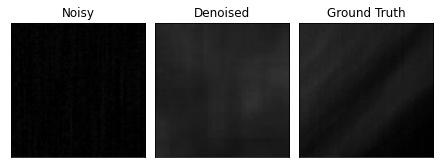

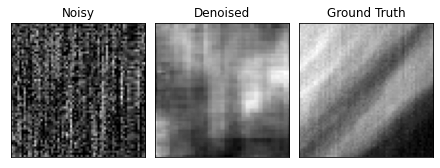

RMSE-NZ  Pred=0.0581  Noisy=0.0873 BEST
MAE-NZ   Pred=0.0492  Noisy=0.0780 BEST
PSNR     Pred=9.7 dB Noisy=6.2 dB BEST
Accuracy Pred=0.10    Noisy=0.06 BEST
SSM      Pred=0.70    Noisy=0.17
HOG MSE  Pred=0.14    Noisy=0.17
******************************************************
Index:15
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_01_00_2_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_01_00_2_nitid_idx008.tif


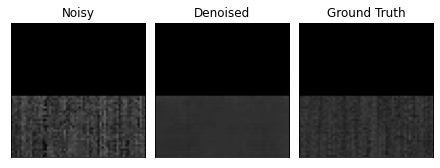

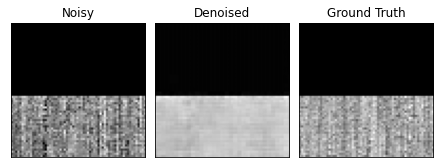

RMSE-NZ  Pred=0.0219  Noisy=0.0789 BEST
MAE-NZ   Pred=0.0134  Noisy=0.0631 BEST
PSNR     Pred=22.4 dB Noisy=11.2 dB BEST
Accuracy Pred=0.65    Noisy=0.09 BEST
SSM      Pred=0.74    Noisy=0.63
HOG MSE  Pred=0.23    Noisy=0.02
******************************************************
Index:16
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0726_03_01_15_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0726_03_01_15_nitid_idx017.tif


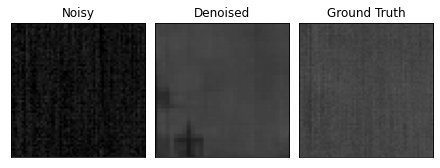

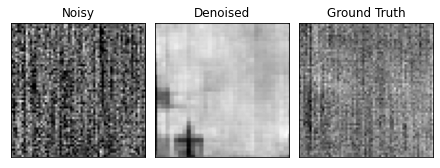

RMSE-NZ  Pred=0.0375  Noisy=0.2053 BEST
MAE-NZ   Pred=0.0266  Noisy=0.2012 BEST
PSNR     Pred=19.5 dB Noisy=4.7 dB BEST
Accuracy Pred=0.27    Noisy=0.00 BEST
SSM      Pred=0.68    Noisy=0.21
HOG MSE  Pred=0.07    Noisy=0.05
******************************************************


In [11]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )